## Будем обучать сеть

Исходя из параметров векторов будем использовать гиперболический тангенс

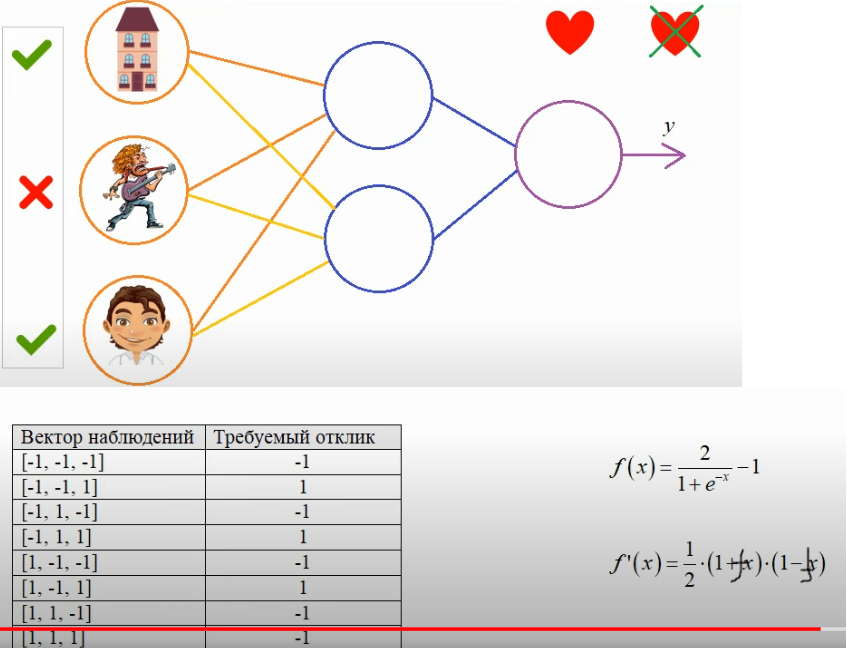

In [1]:
import numpy as np

In [43]:
def func(x):  # формула для функции гиперболического тангенса
    return 2/(1 + np.exp(-x)) - 1

def dfunc(x):  # формула для производной функции
    return 0.5*(1+x)*(1-x)

W1 = np.array([[-0.2, 0.3, -0.4], [0.1, -0.3, -0.4]]) # веса для входных сигналов
W2 = np.array([0.2, 0.3])  # для второго слоя

def go(inputs):
    sum = np.dot(W1, inputs)
    out = np.array([func(x) for x in sum])  # выходные значения для каждого нейрона скрытого слоя
    
    sum = np.dot(W2, out)
    y = func(sum)
    return (y, out)


# Далее функция для обучения НС
def train(epoch):
    global W1, W2
    lmbd = 0.01  # шаг обучения
    N = 10_000  # кол-во итераций
    cnt = len(epoch)
    for k in range(N):
        x = epoch[np.random.randint(0, cnt)]  # рандомно выбираем значения входных сигналов из выборки
        y, out = go(x[0:3])  # прогоняяя через функцию вучисляем значения выходных сигналов с НС и нейронов
        e = y - x[-1]  # вычисляем значение ошибки на последнем нейроне, где x[-1] - требуемый/ожидаемый отклик
        delta = e * dfunc(y)  # локальный градиент
        
        
        # корректировка весов последнего/второго слоя:
        W2[0] = W2[0] - lmbd * delta * out[0]  # первая связь
        W2[1] = W2[1] - lmbd * delta * out[1]  # вторая связь
        
        # зная лок градиент выходного уровня, можем вычислить лок градиент для скрытого слоя
        delta2 = W2 * delta *dfunc(out) 
        
        # корректировка весов первого слоя:
        W1[0,:] = W1[0,:] - lmbd * delta2[0] * np.array(x[0:3])
        W1[1,:] = W1[1,:] - lmbd * delta2[1] * np.array(x[0:3])        
        

# далее список кортежей - это три значения входных сигналов и требуемый отклик:
epoch = [(-1, -1, -1, -1),
        (-1, -1, 1, 1),
        (-1, 1, -1, -1),
        (-1, 1, 1, 1),
        (1, -1, -1, -1),
        (1, -1, 1, 1),
        (1, 1, -1, -1),
        (1, 1, 1, -1)]
    
train(epoch)  # обучение сети

for x in epoch:
    y, out = go(x[0:3])
    print(f'Значение сети: {y} => {x[-1]} - требуемый отклик')


Значение сети: 0.12495864235681142 => -1 - требуемый отклик
Значение сети: 0.9358364628277258 => 1 - требуемый отклик
Значение сети: -0.8689328478643172 => -1 - требуемый отклик
Значение сети: 0.8769729273071021 => 1 - требуемый отклик
Значение сети: -0.876972927307102 => -1 - требуемый отклик
Значение сети: 0.8689328478643172 => 1 - требуемый отклик
Значение сети: -0.9358364628277259 => -1 - требуемый отклик
Значение сети: -0.12495864235681153 => -1 - требуемый отклик
